# 運用python 裡面的套件

* 如何模擬這些分布的樣本點
* 進行一些機率的運算

包含以下離散型分布        

1. 離散均勻分布( Discrete Uniform Distribution ) : `stats.randint`     
2. 伯努利分布( Bernoulli Distribution ) : `stats.bernoulli`    
3. 二項分布(Binomial Distribution) : `stats.binom`   

https://www.stat.nuk.edu.tw/cbme/math/statistic/sta2/s2_2/bud.html


In [65]:
# library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics

### 1. 離散均勻分布( Discrete Uniform Distribution )

其中有限個數值擁有相同的機率。離散型均匀分佈的另一種說法為**「有限個結果，各結果的機率均相同」**

例子 :

均勻的骰子就是離散型均勻分布的例子，可能的值為1, 2, 3, 4, 5, 6，而每一個數字的機率都是1/6

但若同時丟二個均勻骰子，將其值相加，就不是離散型均勻分布了，因為各個和的機率不同

https://zh.wikipedia.org/zh-tw/%E9%9B%A2%E6%95%A3%E5%9E%8B%E5%9D%87%E5%8B%BB%E5%88%86%E4%BD%88


- 機率質量函數（Probability Mass Function，PMF）又稱為離散密度函數 :

  是離散隨機變數在各特定取值上的機率

  Probability Mass Function (PMF):<br>
  `stats.randint.pmf()`<br>


- 累積分布函數（Cumulative Distribution Function，CDF）又叫分布函數 :

  是機率密度函數的積分，能完整描述一個實隨機變量X的機率分佈，**PMF 的累加**

  Cumulative Distribution Function(CDF):<br>
  `stats.randint.cdf()`<br>
  

- 百分位函數（Percent Point Function，PPF) 

  累積分佈函數(cumulative density function, CDF)的反函數<br>
  https://flag-editors.medium.com/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92%E5%8B%95%E6%89%8B%E5%81%9Alesson-3-%E5%88%A9%E7%94%A8quantile-transform%E8%AE%93%E8%B3%87%E6%96%99%E5%88%86%E5%B8%83%E8%B6%A8%E8%BF%91%E6%96%BC%E5%B8%B8%E6%85%8B%E5%88%86%E5%B8%83-cb9eb793e013
  
  Percent Point Function(PPF):<br>
  `stats.randint.ppf()`

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.randint.html<br>

**平均數、變異數、偏度和峰度**

`mean, var, skew, kurt = randint.stats(low, high, moments='mvsk')`

https://blog.csdn.net/dkkfff/article/details/115912758

理論上而言，只要偏態或峰態的數值不等於0，即是偏離常態的分配，<br>
但現實生活中蒐集到的資料，不太可能呈現完美的常態分配，因此何種程度的偏態或峰態才屬於實質上偏離常態呢？<br>
對於**偏態**而言，**大於0表示正偏態，小於0表示負偏態**；<br>
對於**峰態**而言，**大於0代表高狹峰，小於0代表低闊峰**。<br>

https://drfishstats.com/descriptive-stats/skewness-kurtosis/



**機率質量函數通常是定義離散機率分布的主要方法**，並且此類函數存在於其定義域是離散的純量變數或多元隨機變數。


* 機率質量函數和機率密度函數的一個不同之處在於：<br>
  機率質量函數是對**離散**隨機變數定義的，**本身代表該值的機率**<br>
  機率密度函數本身不是機率，只有對**連續**隨機變數的機率密度函數必須**在某一個區間內被積分**後才能產生出機率
  
  

**計算離散均勻分布的概率質量分佈 (probability mass function)**

[1 2 3 4 5 6]
[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


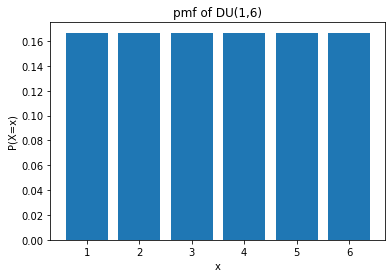

In [66]:
'''
# 離散均勻分布 (Discrete Uniform Distribution)
# 前提：其中有限個數值擁有相同的機率。
'''
# 1.定義離散均勻分布的基本資訊

low=1 
high=7
r = np.arange(low,high)
# 2.計算離散均勻分布的概率質量分佈 (probability mass function)
# 之所以稱為質量，是因為離散的點
# 產生 x 軸的點
#r = np.arange(stats.randint.ppf(0.01, low, high),
#              stats.randint.ppf(0.99, low, high),1)
print(r)
# P(X=x) --> 是機率
probs = stats.randint.pmf(r,low,high)
print(probs)
plt.bar(r, probs)
plt.ylabel('P(X=x)')
plt.xlabel('x')
plt.title('pmf of DU(1,6)')
plt.show()

**計算離散均勻分布的累積機率 (cumulative density function)，pmf 的累加**

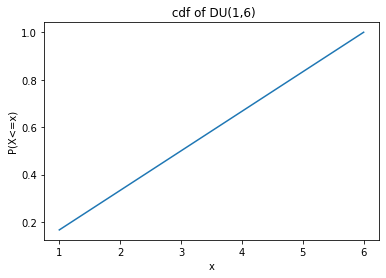

In [67]:
# 3.計算離散均勻分布的累積機率 (cumulative density function)，pmf 的累加
# P(X=x) --> 是機率
cumsum_probs = stats.randint.cdf(r, low,high)
plt.ylabel('P(X<=x)')
plt.xlabel('x')
plt.title(' cdf of DU(1,6)')
plt.plot(r, cumsum_probs)
plt.show()

**百分位函數（Percent Point Function，PPF)** 

累積分佈函數(cumulative density function, CDF)的反函數

透過 cdf ，給定一個 機率值，反推出對應到的 x

In [68]:
# 4.透過 cdf ，給定一個 機率值，反推出對應到的 x
k = stats.randint.ppf(cumsum_probs , low, high)
print(k)
#看上圖看結果

[1. 2. 3. 4. 5. 6.]


**產生符合隨機樣本點 (random sample)**

`stats.randint.rvs()`

[6 4 1 4 5 4 6 3 5 2 1 3 6 6 1 1 5 6 5 1]


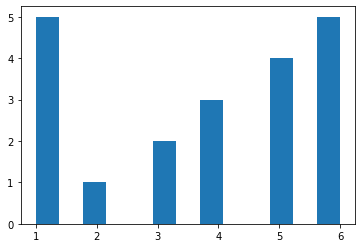

In [69]:
# 5.產生符合隨機樣本點 (random sample)
X = stats.randint.rvs(low,high,size=20)
print(X)
plt.hist(X,bins=13)
plt.show()
#試試看，，每一次的結果一樣嗎?

**計算固定參數下，隨機變數的平均數、變異數、偏度和峰度**

`mean, var, skew, kurt = randint.stats(low, high, moments='mvsk')`

In [70]:
#6.計算固定參數下，隨機變數的平均數、變異數、偏度和峰度。
stat_randint=stats.randint.stats(low,high,moments='mvks')
print(stat_randint)
print(type(stat_randint))
print("randint mean=",float(stat_randint[0]))
print("randint variance=",float(stat_randint[1]))
print("randint kurtosis=",float(stat_randint[2]))
print("randint skew=",float(stat_randint[3]))

(array(3.5), array(2.91666667), array(0.), array(-1.26857143))
<class 'tuple'>
randint mean= 3.5
randint variance= 2.9166666666666665
randint kurtosis= 0.0
randint skew= -1.2685714285714285


### 2. 伯努利分布( Bernoulli Distribution )

又名兩點分布或者0-1分布

是只有兩種可能結果（成功或失敗）的單次隨機試驗<br>
若伯努利試驗成功，則伯努利隨機變數取值為1。若伯努利試驗失敗，則伯努利隨機變數取值為0<br>
成功機率 : p (0 $\leq$ p $\leq$ 1)<br>
失敗機率 : q = 1 - p


- 機率質量函數（Probability Mass Function，PMF）:

  是離散隨機變數在各特定取值上的機率

  Probability Mass Function (PMF):<br>
  `stats.bernoulli.pmf(r,p)`<br>


- 累積分布函數（Cumulative Distribution Function，CDF）又叫分布函數 :

  是機率密度函數的積分，能完整描述一個實隨機變量X的機率分佈，**PMF 的累加**

  Cumulative Distribution Function(CDF):<br>
  `stats.bernoulli.cdf(r,p)`<br>
  

- 百分位函數（Percent Point Function，PPF) 

  累積分佈函數(cumulative density function, CDF)的反函數<br>
  https://flag-editors.medium.com/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92%E5%8B%95%E6%89%8B%E5%81%9Alesson-3-%E5%88%A9%E7%94%A8quantile-transform%E8%AE%93%E8%B3%87%E6%96%99%E5%88%86%E5%B8%83%E8%B6%A8%E8%BF%91%E6%96%BC%E5%B8%B8%E6%85%8B%E5%88%86%E5%B8%83-cb9eb793e013
  
  Percent Point Function(PPF):<br>
  `stats.bernoulli.ppf(cumsum_probs, p)`
  
**平均數、變異數、偏度和峰度**

`mean, var, skew, kurt = stats.bernoulli.stats(p,moments='mvks')`

理論上而言，只要偏態或峰態的數值不等於0，即是偏離常態的分配，<br>
但現實生活中蒐集到的資料，不太可能呈現完美的常態分配，因此何種程度的偏態或峰態才屬於實質上偏離常態呢？<br>
對於**偏態**而言，**大於0表示正偏態，小於0表示負偏態**；<br>
對於**峰態**而言，**大於0代表高狹峰，小於0代表低闊峰**。<br>

https://drfishstats.com/descriptive-stats/skewness-kurtosis/


**計算伯努利分佈的概率質量分佈 (probability mass function)**

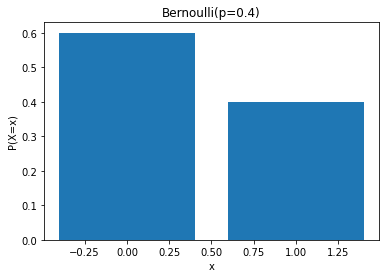

In [71]:
'''
# 伯努利分布( Bernoulli Distribution )
# 前提：是只有兩種可能結果（成功或失敗）的單次隨機試驗，成功的機率為p
'''
# ①定義伯努利分布的基本資訊

# ①定義伯努利分布基本資訊
p = 0.4 # 事件A 機率 0.4
r = np.arange(0,2) # 可以出現的範圍為 0、1,2種可能出現的結果

# ②計算伯努利分佈的概率質量分佈 (probability mass function)
# 之所以稱為質量，是因為離散的點
# P(X=x) --> 是機率
probs = stats.bernoulli.pmf(r,p)
#array([ 0.07776, 0.2592 , 0.3456 , 0.2304 , 0.0768 , 0.01024])
plt.bar(r, probs)
plt.ylabel('P(X=x)')
plt.xlabel('x')
plt.title('Bernoulli(p=0.4)')
plt.show()


**計算伯努利分布的累積機率 (cumulative density function)，pmf 的累加**

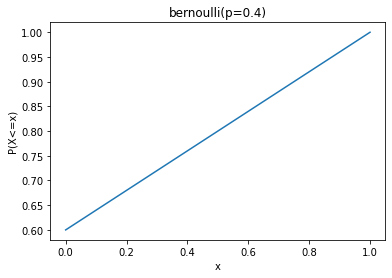

In [72]:
# ③計算伯努利分布的累積機率 (cumulative density function)，pmf 的累加
# P(X=x) --> 是機率
cumsum_probs = stats.bernoulli.cdf(r,p)
plt.ylabel('P(X<=x)')
plt.xlabel('x')
plt.title('bernoulli(p=0.4)')
plt.plot(r, cumsum_probs)
plt.show()

**百分位函數（Percent Point Function，PPF)** 

累積分佈函數(cumulative density function, CDF)的反函數

透過 cdf ，給定一個 機率值，反推出對應到的 x

In [73]:
# ④ 透過 cdf ，給定一個 機率值，反推出對應到的 x
p_loc = stats.bernoulli.ppf(cumsum_probs, p)
print(p_loc)
#看上圖看結果

[0. 1.]


**產生符合隨機樣本點 (random sample)**

`stats.bernoulli.rvs()`

[0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0]


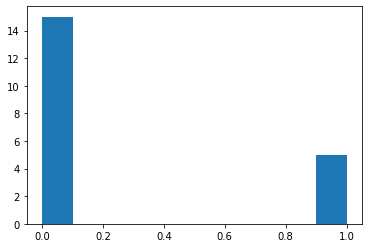

In [74]:
# ⑤產生符合伯努利分布的隨機樣本點 (random sample)
X = stats.bernoulli.rvs(p,size=20)
print(X)
plt.hist(X)
plt.show()


**計算固定參數下，隨機變數的平均數、變異數、偏度和峰度**

`mean, var, skew, kurt = stats.bernoulli.stats(p,moments='mvks')`

In [75]:
#6.計算固定參數下，隨機變數的平均數、變異數、偏度和峰度。
stat_ber=stats.bernoulli.stats(p,moments='mvks')
print(stat_ber)
print(type(stat_ber))
#E(X)
print("bernoulli mean=",float(stat_ber[0]))
print("bernoulli variance=",float(stat_ber[1]))
print("bernoulli kurtosis=",float(stat_ber[2]))
print("bernoulli skew=",float(stat_ber[3]))

(array(0.4), array(0.24), array(0.40824829), array(-1.83333333))
<class 'tuple'>
bernoulli mean= 0.4
bernoulli variance= 0.24
bernoulli kurtosis= 0.40824829046386296
bernoulli skew= -1.8333333333333337


### 3. 二項分布(Binomial Distribution)

**二項分布即重複n次獨立的伯努利試驗**

是n個獨立的是/非試驗中成功的次數的離散機率分布，其中每次試驗的成功機率為p

這樣的單次成功/失敗試驗又稱為伯努利試驗。實際上，當 n = 1 時，二項式分布就是伯努利分布


- 機率質量函數（Probability Mass Function，PMF）:

  是離散隨機變數在各特定取值上的機率

  Probability Mass Function (PMF):<br>
  `stats.binom.pmf(r, n, p)`                    #重複實驗n次<br>


- 累積分布函數（Cumulative Distribution Function，CDF）又叫分布函數 :

  是機率密度函數的積分，能完整描述一個實隨機變量X的機率分佈，**PMF 的累加**

  Cumulative Distribution Function(CDF):<br>
  `stats.binom.cdf(r, n, p)`<br>
  

- 百分位函數（Percent Point Function，PPF) 

  累積分佈函數(cumulative density function, CDF)的反函數<br>
  https://flag-editors.medium.com/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92%E5%8B%95%E6%89%8B%E5%81%9Alesson-3-%E5%88%A9%E7%94%A8quantile-transform%E8%AE%93%E8%B3%87%E6%96%99%E5%88%86%E5%B8%83%E8%B6%A8%E8%BF%91%E6%96%BC%E5%B8%B8%E6%85%8B%E5%88%86%E5%B8%83-cb9eb793e013
  
  Percent Point Function(PPF):<br>
  `stats.binom.ppf(cumsum_probs, n, p)`
  
**平均數、變異數、偏度和峰度**

`mean, var, skew, kurt = mean, var, skew, kurt = stats.binom.stats(n,p,moments='mvks')`

理論上而言，只要偏態或峰態的數值不等於0，即是偏離常態的分配，<br>
但現實生活中蒐集到的資料，不太可能呈現完美的常態分配，因此何種程度的偏態或峰態才屬於實質上偏離常態呢？<br>
對於**偏態**而言，**大於0表示正偏態，小於0表示負偏態**；<br>
對於**峰態**而言，**大於0代表高狹峰，小於0代表低闊峰**。<br>

https://drfishstats.com/descriptive-stats/skewness-kurtosis/



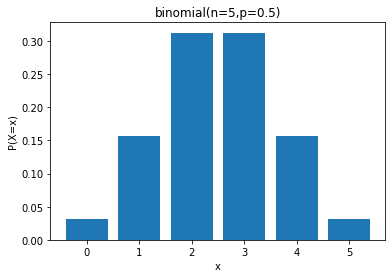

In [76]:
'''
# 二項分布 (binomial distribution)
# 前提：獨立重複試驗、有放回、只有兩個結果
# 二項分布指出，隨機一次試驗出現事件A的機率如果為p，那麼在重複 n 次試驗中出現 x 次事件A的機率為：
# f(n,x,p) = choose(n, x) * p**x * (1-p)**(n-x)
'''
# 1.定義二項分佈的基本資訊
p = 0.5 # 事件A 機率 0.4
n = 5  # 重複實驗5次,
r = np.arange(0,6) # 可以出現的範圍為 0,1,2,...,5-->6種可能出現的結果
#print(type(k))

# 2.計算二項分佈的概率質量分佈 (probability mass function)
# 之所以稱為質量，是因為離散的點
# P(X=x) --> 是機率
probs = stats.binom.pmf(r, n, p)
#array([ 0.07776, 0.2592 , 0.3456 , 0.2304 , 0.0768 , 0.01024])
plt.bar(r, probs)
plt.ylabel('P(X=x)')
plt.xlabel('x')
plt.title('binomial(n=5,p=0.5)')
plt.show()

#學生額外小練習: 可以調整 p 的不同值，p接近於1 時，p=0.5, p 接近於 0時，看 pmf 的變化。

**p = 0**

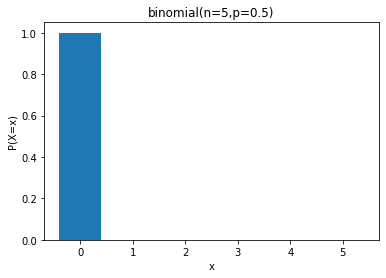

In [77]:
'''
# 二項分布 (binomial distribution)
# 前提：獨立重複試驗、有放回、只有兩個結果
# 二項分布指出，隨機一次試驗出現事件A的機率如果為p，那麼在重複 n 次試驗中出現 x 次事件A的機率為：
# f(n,x,p) = choose(n, x) * p**x * (1-p)**(n-x)
'''
# 1.定義二項分佈的基本資訊
p = 0 # 事件A 機率 0.4
n = 5  # 重複實驗5次,
r = np.arange(0,6) # 可以出現的範圍為 0,1,2,...,5-->6種可能出現的結果
#print(type(k))

# 2.計算二項分佈的概率質量分佈 (probability mass function)
# 之所以稱為質量，是因為離散的點
# P(X=x) --> 是機率
probs = stats.binom.pmf(r, n, p)
#array([ 0.07776, 0.2592 , 0.3456 , 0.2304 , 0.0768 , 0.01024])
plt.bar(r, probs)
plt.ylabel('P(X=x)')
plt.xlabel('x')
plt.title('binomial(n=5,p=0.5)')
plt.show()

#學生額外小練習: 可以調整 p 的不同值，p接近於1 時，p=0.5, p 接近於 0時，看 pmf 的變化。

**p = 0.5**

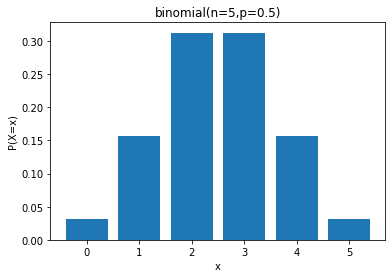

In [78]:
'''
# 二項分布 (binomial distribution)
# 前提：獨立重複試驗、有放回、只有兩個結果
# 二項分布指出，隨機一次試驗出現事件A的機率如果為p，那麼在重複 n 次試驗中出現 x 次事件A的機率為：
# f(n,x,p) = choose(n, x) * p**x * (1-p)**(n-x)
'''
# 1.定義二項分佈的基本資訊
p = 0.5 # 事件A 機率 0.4
n = 5  # 重複實驗5次,
r = np.arange(0,6) # 可以出現的範圍為 0,1,2,...,5-->6種可能出現的結果
#print(type(k))

# 2.計算二項分佈的概率質量分佈 (probability mass function)
# 之所以稱為質量，是因為離散的點
# P(X=x) --> 是機率
probs = stats.binom.pmf(r, n, p)
#array([ 0.07776, 0.2592 , 0.3456 , 0.2304 , 0.0768 , 0.01024])
plt.bar(r, probs)
plt.ylabel('P(X=x)')
plt.xlabel('x')
plt.title('binomial(n=5,p=0.5)')
plt.show()

#學生額外小練習: 可以調整 p 的不同值，p接近於1 時，p=0.5, p 接近於 0時，看 pmf 的變化。

**p = 1**

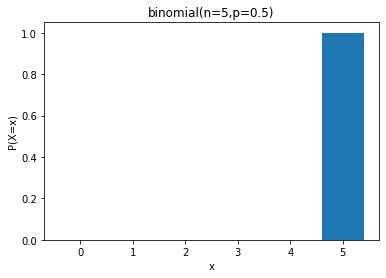

In [79]:
'''
# 二項分布 (binomial distribution)
# 前提：獨立重複試驗、有放回、只有兩個結果
# 二項分布指出，隨機一次試驗出現事件A的機率如果為p，那麼在重複 n 次試驗中出現 x 次事件A的機率為：
# f(n,x,p) = choose(n, x) * p**x * (1-p)**(n-x)
'''
# 1.定義二項分佈的基本資訊
p = 1 # 事件A 機率 0.4
n = 5  # 重複實驗5次,
r = np.arange(0,6) # 可以出現的範圍為 0,1,2,...,5-->6種可能出現的結果
#print(type(k))

# 2.計算二項分佈的概率質量分佈 (probability mass function)
# 之所以稱為質量，是因為離散的點
# P(X=x) --> 是機率
probs = stats.binom.pmf(r, n, p)
#array([ 0.07776, 0.2592 , 0.3456 , 0.2304 , 0.0768 , 0.01024])
plt.bar(r, probs)
plt.ylabel('P(X=x)')
plt.xlabel('x')
plt.title('binomial(n=5,p=0.5)')
plt.show()

#學生額外小練習: 可以調整 p 的不同值，p接近於1 時，p=0.5, p 接近於 0時，看 pmf 的變化。

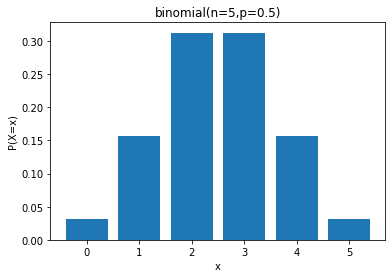

In [80]:
'''
# 二項分布 (binomial distribution)
# 前提：獨立重複試驗、有放回、只有兩個結果
# 二項分布指出，隨機一次試驗出現事件A的機率如果為p，那麼在重複 n 次試驗中出現 x 次事件A的機率為：
# f(n,x,p) = choose(n, x) * p**x * (1-p)**(n-x)
'''
# 1.定義二項分佈的基本資訊
p = 0.5 # 事件A 機率 0.4
n = 5  # 重複實驗5次,
r = np.arange(0,6) # 可以出現的範圍為 0,1,2,...,5-->6種可能出現的結果
#print(type(k))

# 2.計算二項分佈的概率質量分佈 (probability mass function)
# 之所以稱為質量，是因為離散的點
# P(X=x) --> 是機率
probs = stats.binom.pmf(r, n, p)
#array([ 0.07776, 0.2592 , 0.3456 , 0.2304 , 0.0768 , 0.01024])
plt.bar(r, probs)
plt.ylabel('P(X=x)')
plt.xlabel('x')
plt.title('binomial(n=5,p=0.5)')
plt.show()

#學生額外小練習: 可以調整 p 的不同值，p接近於1 時，p=0.5, p 接近於 0時，看 pmf 的變化。

**計算二項分佈的累積機率 (cumulative density function)，pmf 的累加**

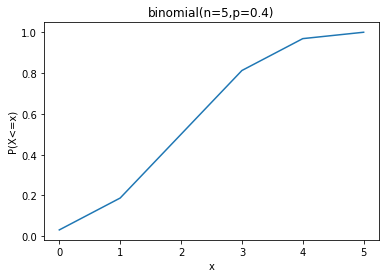

In [81]:
# 3.計算二項分佈的累積機率 (cumulative density function)，pmf 的累加
# 之所以稱為質量，是因為離散的點，預設體積（即寬度）為1
# P(X=x) --> 是機率
cumsum_probs = stats.binom.cdf(r, n, p)
#array([ 0.07776, 0.2592 , 0.3456 , 0.2304 , 0.0768 , 0.01024])
plt.show()
plt.ylabel('P(X<=x)')
plt.xlabel('x')
plt.title('binomial(n=5,p=0.4)')
plt.plot(r, cumsum_probs)
plt.show()

**百分位函數（Percent Point Function，PPF)** 

累積分佈函數(cumulative density function, CDF)的反函數

透過 cdf ，給定一個 機率值，反推出對應到的 x

In [82]:
# 4.透過 cdf ，給定一個 機率值，反推出對應到的 x
p_loc= stats.binom.ppf(cumsum_probs, n, p)
print(p_loc)
#看上圖看結果

[0. 1. 2. 3. 4. 5.]


**產生符合隨機樣本點 (random sample)**

`stats.binom.rvs()`

[2 3 3 3 1 1 4 3 2 2 2 4 2 1 4 5 2 3 3 3]


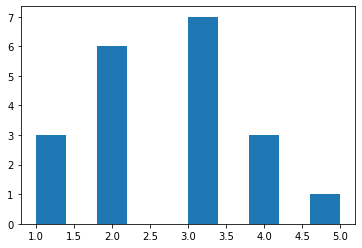

In [83]:
# 5.產生符合二項分佈的隨機樣本點 (random sample)
X = stats.binom.rvs(n,p,size=20)
#array([2, 3, 1, 2, 2, 2, 1, 2, 2, 3, 3, 0, 1, 1, 1, 2, 3, 4, 0, 3])
print(X)
plt.hist(X)
plt.show()
#試試看，，每一次的結果一樣嗎?

**計算固定參數下，隨機變數的平均數、變異數、偏度和峰度**

`mean, var, skew, kurt = stats.binom.stats(n,p,moments='mvks')`

In [84]:
#6.計算固定參數下，隨機變數的平均數、變異數、偏度和峰度。
stat_bin=stats.binom.stats(n,p,moments='mvks')
print(stat_bin)
print(type(stat_bin))
#E(X)
print("binomial mean=",float(stat_bin[0]))
print("binomial variance=",float(stat_bin[1]))
print("binomial kurtosis=",float(stat_bin[2]))
print("binomial skew=",float(stat_bin[3]))

(array(2.5), array(1.25), array(0.), array(-0.4))
<class 'tuple'>
binomial mean= 2.5
binomial variance= 1.25
binomial kurtosis= 0.0
binomial skew= -0.4
